In [1]:
import sys
import os

In [2]:
from vdyn.models.longitudinal_1d import Vehicle, accel_brake_run, to_kmh, time_to_speed
import matplotlib.pyplot as plt
from vdyn.models.powertrain import Powertrain, Gearbox, TorqueCurve
import numpy as np

([<matplotlib.axis.YTick at 0x7ee69abdd700>,
 [Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6')])

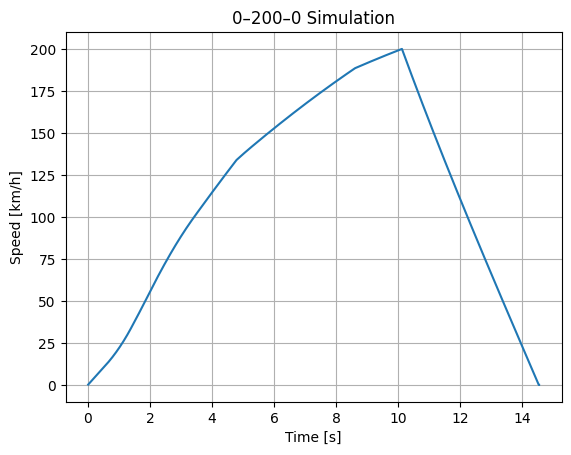

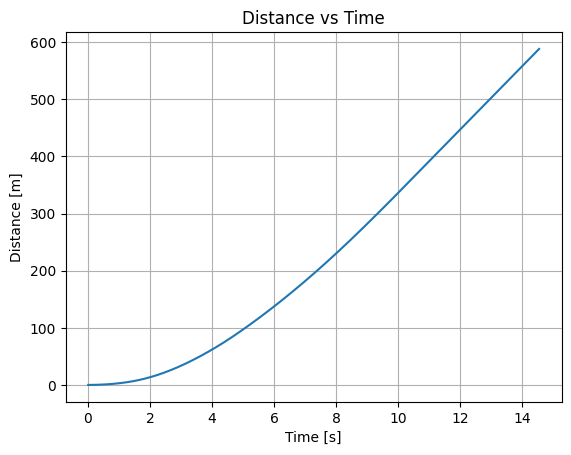

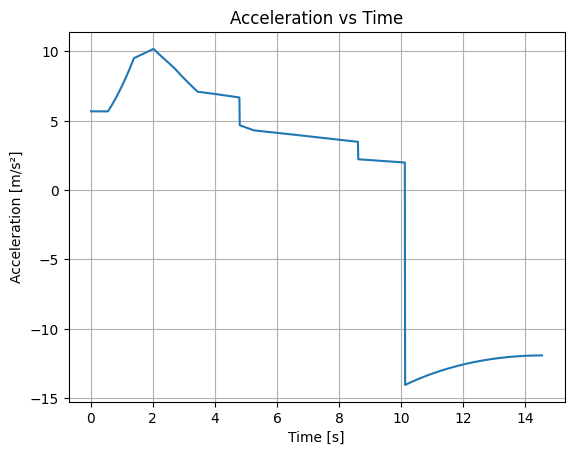

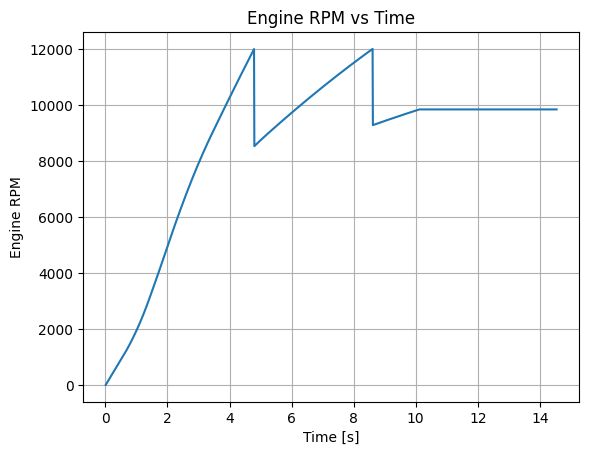

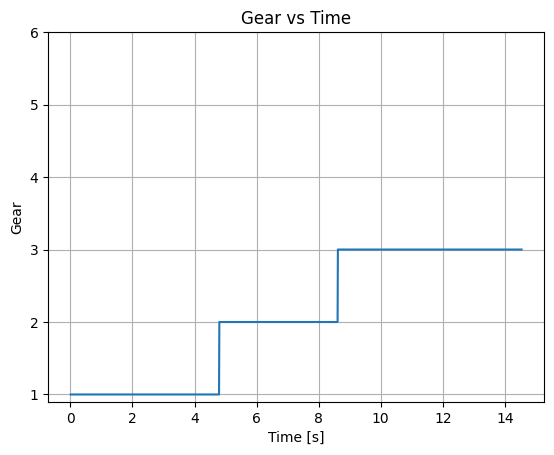

In [4]:
my_rpm = np.array([1000, 3000, 5000, 7000, 9000], dtype=float)
my_torque = np.array([150, 250, 270, 240, 200], dtype=float)
my_torque_curve = TorqueCurve(rpm=my_rpm, torque_nm=my_torque)
gbx = Gearbox(ratios=[3.10, 2.20, 1.70, 1.35, 1.12, 0.95], final_drive=3.6, wheel_radius_m=0.33)
pt = Powertrain(curve=my_torque_curve, box=gbx)

car = Vehicle()
T, V, S, A, G, R, = accel_brake_run(car, dt=0.01, powertrain = pt)


plt.figure()
plt.plot(T, to_kmh(V))
plt.xlabel("Time [s]")
plt.ylabel("Speed [km/h]")
plt.title("0–200–0 Simulation")
plt.grid(True)

plt.figure()
plt.plot(T, S)
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.title("Distance vs Time")
plt.grid(True)

plt.figure()
plt.plot(T, A)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [m/s²]")
plt.title("Acceleration vs Time")
plt.grid(True)

plt.figure()
plt.plot(T, R)
plt.xlabel("Time [s]")
plt.ylabel("Engine RPM")
plt.title("Engine RPM vs Time")
plt.grid(True)

plt.figure()
plt.plot(T, G)
plt.xlabel("Time [s]")
plt.ylabel("Gear")
plt.title("Gear vs Time")
plt.grid(True)
plt.yticks(range(1, 7))
